<a href="https://colab.research.google.com/github/Neelanjansarkar/python-image-projects/blob/main/Image_Filters_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
image=Image.open("maninsuit.jpg").convert("L")
image = image.resize((256, 256))

In [6]:
image_np = np.array(image, dtype=np.float32) / 255.0

In [7]:
image_tf = np.expand_dims(image_np, axis=(0, -1))

In [9]:
vertical_edge_filter = np.array([[1, 0, -1],
                                 [1, 0, -1],
                                 [1, 0, -1]], dtype=np.float32)
horizontal_edge_filter = np.array([[1, 1, 1],
                                   [0, 0, 0],
                                   [-1, -1, -1]], dtype=np.float32)

In [11]:
vertical_edge_filter_tf = vertical_edge_filter.reshape(3, 3, 1, 1)
horizontal_edge_filter_tf = horizontal_edge_filter.reshape(3, 3, 1, 1)

In [13]:
vertical_edges_tensor = tf.nn.conv2d(image_tf, vertical_edge_filter_tf, strides=[1, 1, 1, 1], padding="SAME")
horizontal_edges_tensor = tf.nn.conv2d(image_tf, horizontal_edge_filter_tf, strides=[1, 1, 1, 1], padding="SAME")

In [15]:
original_image_plot = image_tf.squeeze()
vertical_edges_plot = vertical_edges_tensor.numpy().squeeze()
horizontal_edges_plot = horizontal_edges_tensor.numpy().squeeze()

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

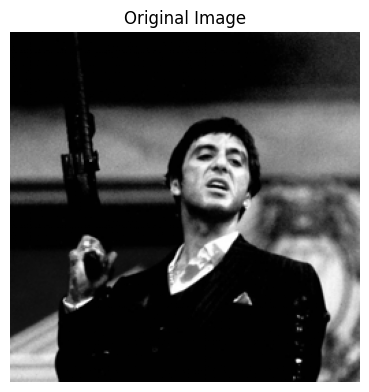

In [17]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(original_image_plot, cmap='gray')
plt.title('Original Image')
plt.axis('off')


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

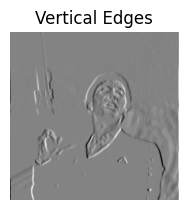

In [19]:
plt.subplot(2, 2, 3)
plt.imshow(vertical_edges_plot, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

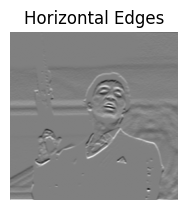

In [21]:
plt.subplot(2, 2, 4)
plt.imshow(horizontal_edges_plot, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>